In [33]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

In [34]:
data_high_bound = 30
data_low_bound = -20
need_to_normalized = False
need_to_write_result_to_csv = True

data = pd.read_excel('./dataset/rt_df_thermo1.xlsx')
data.head()

,ID,formula,the thermal expansion,Normalized_Formulas
0,1,Fe3Ni,14.00,Fe0.7500Ni0.2500
1,2,Fe3Ni0.5Pt0.5,16.80,Fe0.7500Ni0.1250Pt0.1250
2,3,Fe3Pt,-30.00,Fe0.7500Pt0.2500
3,4,Fe0.75Pt0.25,-26.00,Fe0.7500Pt0.2500
4,5,Fe0.75Ni0.125Pt0.125,11.37,Fe0.7500Ni0.1250Pt0.1250


In [35]:
# 函数：解析化学成分及其比例
def parse_normalized_formulas(formula):
    """
    将Normalized_Formulas解析为化学成分及其比例。
    返回一个字典，键为化学成分，值为比例。
    """
    elements = re.findall(r'([A-Z][a-z]*)(\d*\.?\d+)', formula)
    return {element: float(ratio) for element, ratio in elements}

In [36]:
# 提取所有化学成分
all_elements = set()
for formula in data['Normalized_Formulas']:
    parsed = parse_normalized_formulas(formula)
    all_elements.update(parsed.keys())

In [37]:
all_elements

{'Al',
 'As',
 'B',
 'Ba',
 'Bi',
 'Br',
 'C',
 'Ca',
 'Cd',
 'Ce',
 'Co',
 'Cr',
 'Cs',
 'Cu',
 'Dy',
 'Er',
 'Eu',
 'F',
 'Fe',
 'Ga',
 'Gd',
 'Ge',
 'H',
 'Hf',
 'Ho',
 'I',
 'In',
 'K',
 'La',
 'Li',
 'Lu',
 'Mg',
 'Mn',
 'Mo',
 'N',
 'Nb',
 'Nd',
 'Ni',
 'O',
 'Os',
 'P',
 'Pb',
 'Pr',
 'Pt',
 'Rb',
 'Re',
 'Rh',
 'Ru',
 'S',
 'Sb',
 'Sc',
 'Se',
 'Si',
 'Sm',
 'Sn',
 'Sr',
 'Ta',
 'Tb',
 'Te',
 'Ti',
 'V',
 'W',
 'Y',
 'Yb',
 'Zn',
 'Zr'}

In [38]:
# 确保列顺序一致
all_elements = sorted(all_elements)

# 创建新列：每个元素作为一列，未出现的元素填充为0
for element in all_elements:
    data[element] = data['Normalized_Formulas'].apply(
        lambda x: parse_normalized_formulas(x).get(element, 0)
    )

In [39]:
data.head()

,ID,formula,the thermal expansion,Normalized_Formulas,Al,As,B,Ba,Bi,Br,...,Ta,Tb,Te,Ti,V,W,Y,Yb,Zn,Zr
0,1,Fe3Ni,14.00,Fe0.7500Ni0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Fe3Ni0.5Pt0.5,16.80,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Fe3Pt,-30.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Fe0.75Pt0.25,-26.00,Fe0.7500Pt0.2500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Fe0.75Ni0.125Pt0.125,11.37,Fe0.7500Ni0.1250Pt0.1250,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
df = data.copy()
df = df.drop('formula', axis=1)
df = df.drop('Normalized_Formulas', axis=1)
df = df.drop('ID', axis=1)
df.head()

,the thermal expansion,Al,As,B,Ba,Bi,Br,C,Ca,Cd,...,Ta,Tb,Te,Ti,V,W,Y,Yb,Zn,Zr
0,14.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-30.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-26.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 脏数据清洗

In [41]:
# 删除 'the thermal expansion' 列中大于 data_high_bound 的行
df_cleaned = df[df['the thermal expansion'] <= data_high_bound]

# 删除 'the thermal expansion' 列中小于 data_low_bound 的行
df_cleaned = df_cleaned[df_cleaned['the thermal expansion'] >= data_low_bound]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

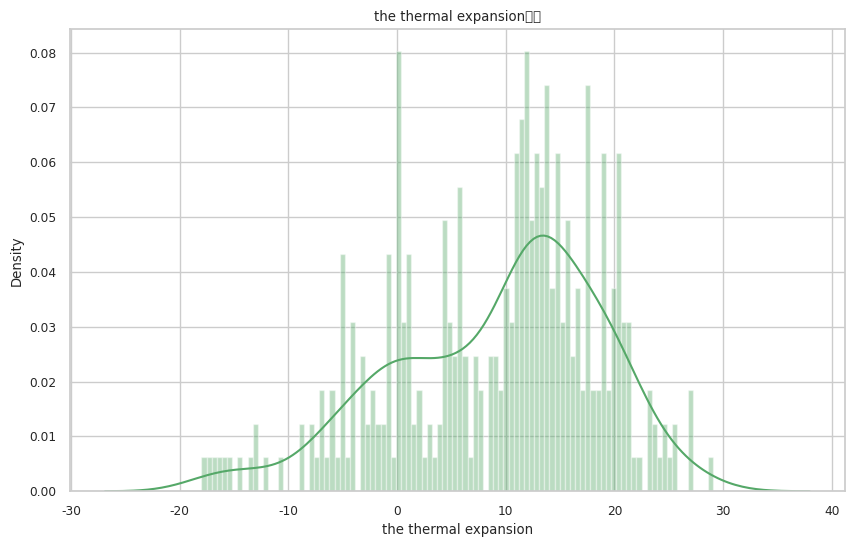

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

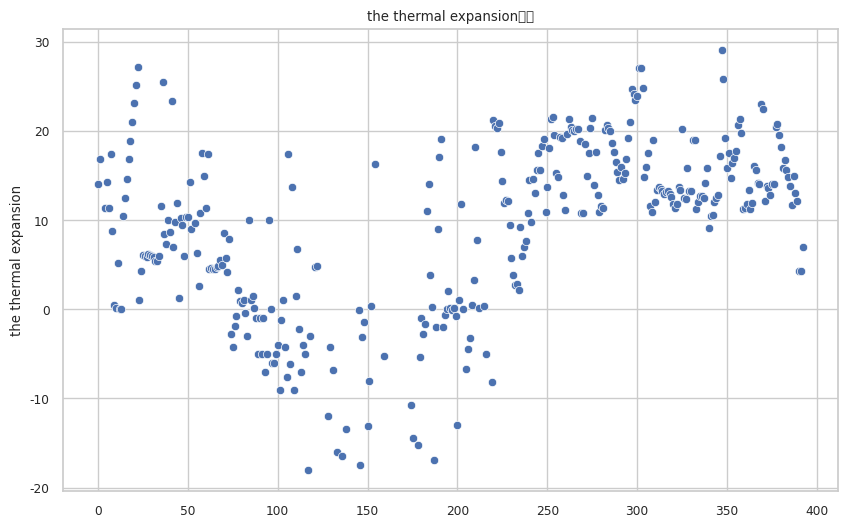

In [42]:
import class_plotpicture as pl

# 绘制目标特征的条形图
pl.plot_prediction_feature(df_cleaned, 'the thermal expansion', 'ImageOfThermal')

# 大致符合正态分布

In [43]:
# 绘制数据的相关性：热力图
# pl.plot_headmap(df_cleaned, 'the thermal expansion', 'ImageOfThermal')

# 划分数据，进行训练和测试

In [44]:
all_features = df_cleaned.drop('the thermal expansion', axis=1)
all_labels = df_cleaned['the thermal expansion']
print(f'全部的特征：{all_features.shape}')
print(f'全部的标签：{all_labels.shape}')

全部的特征：(344, 66)
全部的标签：(344,)


In [45]:
from sklearn.preprocessing import StandardScaler
import numpy as np
# 标准化特征
scaler = StandardScaler()
all_labels_scaler = scaler.fit_transform(np.array(all_labels).reshape(-1, 1))
all_labels = np.array(all_labels).reshape(-1, 1)

In [46]:
from sklearn.model_selection import train_test_split
# 将总的数据集分开。这里根据是否需要对特征进行标准化
if need_to_normalized:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels_scaler, test_size=0.2, random_state=42)
else:
    X_train, X_test, y_train, y_test = train_test_split(all_features, all_labels, test_size=0.2, random_state=42)
print(f'训练集的特征：{X_train.shape}, 标签：{y_train.shape}')
print(f'测试集的特征：{X_test.shape}, 标签：{y_test.shape}')

训练集的特征：(275, 66), 标签：(275, 1)
测试集的特征：(69, 66), 标签：(69, 1)


In [47]:
import torch
from torch import nn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import class_common as comn

In [48]:
# 转为 torch类型
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(f'训练集的特征：{X_train.shape}, 标签：{y_train.shape}')
print(f'测试集的特征：{X_test.shape}, 标签：{y_test.shape}')

训练集的特征：torch.Size([275, 66]), 标签：torch.Size([275, 1])
测试集的特征：torch.Size([69, 66]), 标签：torch.Size([69, 1])


In [49]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.normal_(m.weight, std=0.01)

batch_size, num_epochs, weight_decay = 128, 300, 0.001
# 计算损失值
loss = nn.MSELoss(reduction='none')
# 训练模型
lr = 0.01
# 设置优化器
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(X_train.shape[1], 128),
                    nn.ReLU(),
                    nn.Linear(128, 128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64, 32),
                    nn.ReLU(),
                    nn.Linear(32, 1),
                    )
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=66, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=128, bias=True)
  (4): ReLU()
  (5): Linear(in_features=128, out_features=64, bias=True)
  (6): ReLU()
  (7): Linear(in_features=64, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=1, bias=True)
)

In [50]:
mse, r2 = comn.train_decay(net, X_train, X_test, y_train, y_test, batch_size=batch_size, 
                           loss=loss, num_epochs=num_epochs, weight_decay=weight_decay)
print(f'MLP模型【原始数据】：MSE:{mse:.5f}, r2: {r2:.5f}')

神经网络模型【原数据】MSE:97.71941,r2: 0.00585
MLP模型【原始数据】：MSE:97.71941, r2: 0.00585


In [51]:
train_pred = net(X_train).detach().numpy()
label_pred = net(X_test).detach().numpy()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

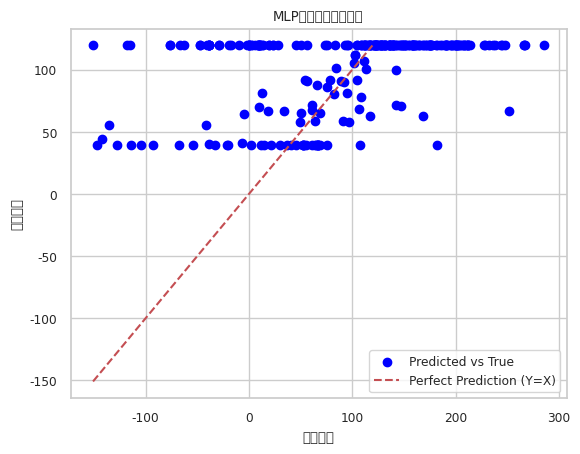

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

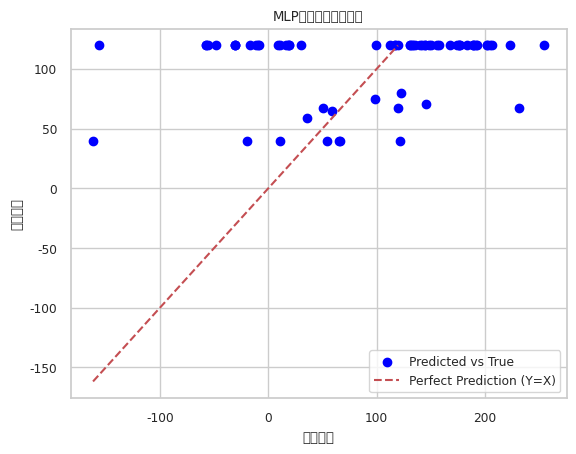

In [52]:
import matplotlib.pyplot as plt
# 先将数据反归一化
salered_train_label_pred = scaler.inverse_transform(train_pred.reshape(-1,1))
salered_train_labels = scaler.inverse_transform(y_train)
plt.scatter(salered_train_labels, salered_train_label_pred, color='blue', label='Predicted vs True')
# 绘制Y=X的直线，表示完美预测
plt.plot([min(salered_train_labels), max(salered_train_label_pred)], [min(salered_train_labels), max(salered_train_label_pred)], 'r--', label='Perfect Prediction (Y=X)')
# 添加图例
plt.legend()
# 设置坐标轴标签
plt.xlabel('真确的值')
plt.ylabel('预测的值')
# 设置标题
plt.title('MLP的训练集预测结果')
# 显示图形
plt.show()

# 预测集
salered_test_labels = scaler.inverse_transform(y_test)
salered_label_pred = scaler.inverse_transform(label_pred.reshape(-1,1))
plt.scatter(salered_test_labels, salered_label_pred, color='blue', label='Predicted vs True')
# 绘制Y=X的直线，表示完美预测
plt.plot([min(salered_test_labels), max(salered_label_pred)], [min(salered_test_labels), max(salered_label_pred)], 'r--', label='Perfect Prediction (Y=X)')
# 添加图例
plt.legend()
# 设置坐标轴标签
plt.xlabel('真确的值')
plt.ylabel('预测的值')
# 设置标题
plt.title('MLP的测试集预测结果')
# 显示图形
plt.show()

# 查看预测的偏差值

findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

预测值大于原值的个数：30, 预测值小于原值的个数：39
[0 1 0 0 3 1 5 0 6 8 3 2 5 3]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: Microsoft YaHei
findfont: Generic family 'sans-serif' not found because none of the following fa

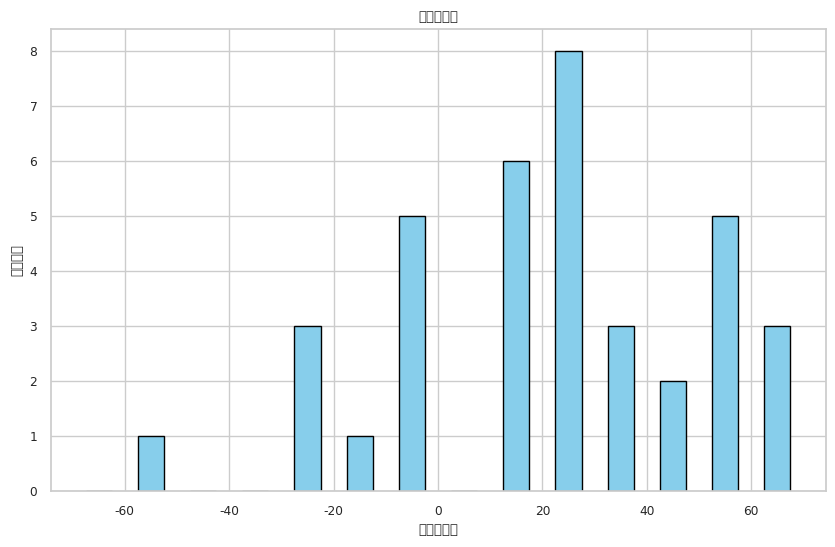

In [53]:

big_num = 0
small_num = 0
for i in range(len(label_pred)):
    if label_pred[i].mean() >= y_test[i].mean():
        big_num += 1
    else:
        small_num += 1
print(f'预测值大于原值的个数：{big_num}, 预测值小于原值的个数：{small_num}')

# 计算偏移量
value = []
for i in range(len(label_pred)):
    value.append(salered_test_labels[i] - salered_label_pred[i])

bins = np.arange(-70, 71, 10)  # 从-1到1，每隔0.1一个区间
counts, _ = np.histogram(value, bins=bins)
print(counts)
bin_centers = (bins[:-1] + bins[1:]) / 2
# 绘制柱形图
plt.figure(figsize=(10, 6))  # 设置图形大小
plt.bar(bin_centers, counts, width=5, color='skyblue', edgecolor='black')  # 宽度设置为0.1与区间宽度相匹配

# 添加标题和轴标签
plt.title('误差偏移量')
plt.xlabel('偏移量区间')
plt.ylabel('统计个数')

# 显示网格
plt.grid(True)
plt.show()